In [1]:
import csv
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta
from time import strftime
import pandas as pd
import re
import time
import requests
from dateutil import rrule
from time import mktime
from requests.exceptions import RetryError
from random import randint
import pycountry

In [2]:
with open('ITU_IDI,ITU_IDI_RANK.csv') as f:
    ict_index = pd.read_csv(f)
ict_index

,Unnamed: 0,2012,2012.1,2011,2011.1
0,Country,ICT Development Index (IDI) rank,ICT Development Index (IDI),ICT Development Index (IDI) rank,ICT Development Index (IDI)
1,Albania,80,4.106720132,80,3.801560792
2,Algeria,106,3.074404965,105,2.983480327
3,Angola,139,1.683850142,138,1.63429124
4,Antigua and Barbuda,49,5.737554838,44,5.701137058
5,Argentina,53,5.364784111,53,5.062127368
6,Armenia,74,4.450191816,75,4.178429446
7,Australia,11,7.900518532,15,7.544003318
8,Austria,21,7.355537188,21,7.101930367
9,Azerbaijan,61,5.011080255,60,4.622638387


In [3]:
with open('gdp.csv') as f:
    gdp_data = pd.read_csv(f)
gdp_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,35973.780510,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1247.066144,1482.098837,1581.600836,1660.739856,1873.153946,1913.160644,1937.235365,1926.357336,1944.117005,1980.516177
2,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5743.098881,5718.685523,5778.380803,5911.254092,6110.423392,6403.767556,6591.538820,6631.618694,6440.990242,6388.960022
3,Albania,ALB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8228.337106,8813.252003,9637.345368,10207.764699,10526.241215,10570.952998,11259.264500,11334.220932,11559.300844,12020.690732
4,Andorra,AND,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,13672.688711,13575.981663,14064.010493,14444.877924,15333.661872,15703.193470,16011.252929,16337.966493,16716.546903,16922.104297
6,United Arab Emirates,ARE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,68508.706815,58822.146138,56074.880687,58363.678216,60513.619710,63839.335575,67360.347446,70887.390727,73017.480010,73878.467665
7,Argentina,ARG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,17711.441787,16618.120852,18333.543699,19629.351845,19579.006484,20161.496832,19802.100011,20356.915510,20042.540020,20786.679328
8,Armenia,ARM,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7260.968756,6323.578336,6567.258582,7022.103943,7649.491409,7997.387128,8397.099178,8727.558325,8832.763435,9647.486113
9,American Samoa,ASM,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
with open('country_sum.csv') as f:
    country_sum = pd.read_csv(f)

country_exception = {
    'GB': 'United Kingdom of Great Britain and Northern I',
    'HK': 'Hong Kong'
}

idi = []
gdp = []
for country_code in country_sum['country']:
    c = pycountry.countries.get(alpha_2=country_code).name
    try:
        idi.append(float(list(ict_index.loc[ict_index['Unnamed: 0'] == c]['2011.1'])[0]))
    except (KeyError, IndexError):
        idi.append(0)

    try:
        gdp.append(float(list(gdp_data.loc[gdp_data['Country Name'] == c]['2016'])[0]))
    except (KeyError, IndexError):
        gdp.append(0)

print(country_sum.shape)
print(len(idi))       

country_sum['IDI'] = idi
country_sum['GDP'] = gdp

country_sum['ratio'] = country_sum['ratio']*1000

country_sum

(33, 4)
33


,country,as_counts,possible_ip_counts,ratio,IDI,GDP
0,AR,13,4307428,0.003018,5.062127,20042.540020
1,AT,34,22461772,0.001514,7.101930,50521.482624
2,AU,19,3337744,0.005692,7.544003,46144.120814
3,BY,250,1993944,0.125380,5.566802,18089.050326
4,CA,248,1520378,0.163117,7.137292,44819.483600
5,CN,382,252966644,0.054284,3.862574,15530.634274
6,CZ,67,1370398,0.048891,6.301280,0.000000
7,DE,1414,40104418,1.127897,7.328867,48943.101805
8,DK,18,6928964,0.002598,8.184300,49029.014839
9,ES,34,14908910,0.006597,6.646929,36305.222132


IDI


NameError: name 'spearmanr' is not defined

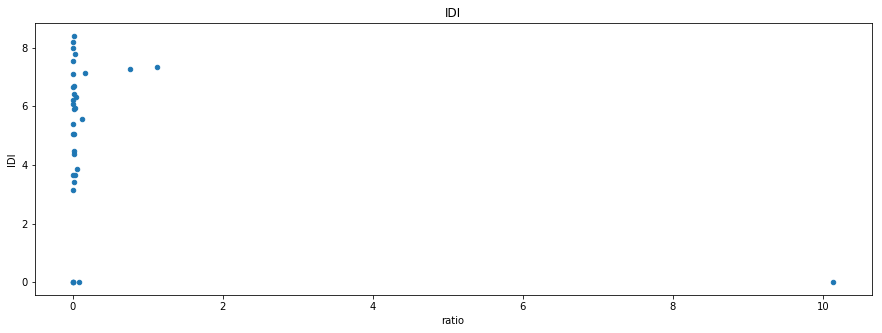

In [5]:
country_sum.plot.scatter(x='ratio', y='IDI', figsize=(15,5), title='IDI')
print('IDI')
print(spearmanr(country_sum['ratio'], country_sum['IDI']))
print(pearsonr(country_sum['ratio'], country_sum['IDI']))

print('GDP')
print(spearmanr(country_sum['ratio'], country_sum['GDP']))
print(pearsonr(country_sum['ratio'], country_sum['GDP']))
country_sum.plot.scatter(x='ratio', y='GDP', figsize=(15,5), title='GDP')

In [6]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

print(spearmanr(country_sum['ratio'], country_sum['IDI']))
print(pearsonr(country_sum['ratio'], country_sum['IDI']))

SpearmanrResult(correlation=0.03850022133105793, pvalue=0.8315471025242476)
(-0.31990637036837344, 0.06954065853513572)


IDI (0.21974477581290852, 0.22687567072453582)
GDP (0.28261524221973533, 0.11705613290983936)
IDI SpearmanrResult(correlation=0.12383054191211904, pvalue=0.4995310710820763)
GDP SpearmanrResult(correlation=0.06573643105581886, pvalue=0.7207522727613089)


,country,as_counts,possible_ip_counts,ratio,IDI,GDP
0,AR,13,4307428,0.003018,5.062127,20042.540020
1,AT,34,22461772,0.001514,7.101930,50521.482624
2,AU,19,3337744,0.005692,7.544003,46144.120814
3,BY,250,1993944,0.125380,5.566802,18089.050326
4,CA,248,1520378,0.163117,7.137292,44819.483600
5,CN,382,252966644,0.054284,3.862574,15530.634274
6,CZ,67,1370398,0.048891,6.301280,0.000000
7,DE,1414,40104418,1.127897,7.328867,48943.101805
8,DK,18,6928964,0.002598,8.184300,49029.014839
9,ES,34,14908910,0.006597,6.646929,36305.222132


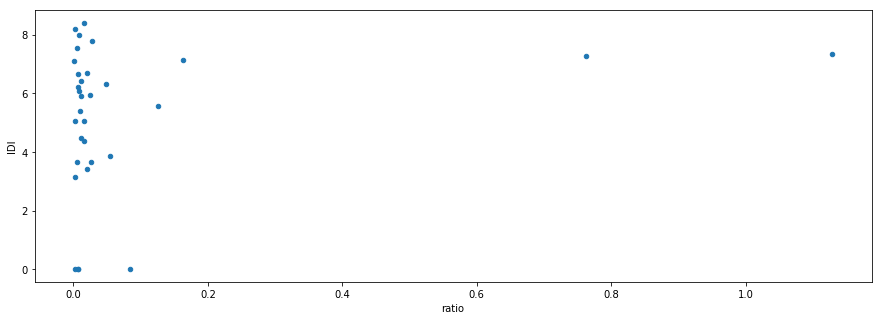

In [7]:
us_removed = country_sum.drop(country_sum.index[30])
us_removed.plot.scatter(x='ratio', y='IDI', figsize=(15,5))
print('IDI {}'.format(pearsonr(us_removed['ratio'], us_removed['IDI'])))
print('GDP {}'.format(pearsonr(us_removed['ratio'], us_removed['GDP'])))
us_removed

print('IDI {}'.format(spearmanr(us_removed['ratio'], us_removed['IDI'])))
print('GDP {}'.format(spearmanr(us_removed['ratio'], us_removed['GDP'])))
us_removed